当前预期斜率：A 0.44048830111902343
周期均价： 19.66
共交易次数： 100
当前价格为： 11.0
当前价格预期增长斜率: 0.44048830111902343
斜率变化向量：
 [ 1.         -1.034588   -1.034588   -0.1190234  -1.4415056  -1.3906409
 -1.0854527   1.         -0.1190234  -1.54323499 -0.7802645   0.6948118
 -1.3397762  -0.3733469   1.          0.2370295   0.8474059  -0.3733469
  0.7965412  -0.3224822   0.8982706   1.          0.2370295  -0.1190234
  0.8982706  -0.4242116   0.6948118  -0.017294    1.         -0.3224822
 -0.3733469  -0.4242116   0.3387589  -0.2207528   0.5930824   1.
 -1.034588    0.4404883   0.7965412  -0.1190234  -0.3224822   0.2370295
  1.          0.9491353  -1.1871821   0.491353    0.0844354   0.6439471
  0.0335707   1.          0.8474059   0.6948118   0.491353    0.8982706
 -1.3397762   0.4404883   1.          0.4404883  -0.8819939  -0.0681587
  0.0844354  -1.3397762  -0.0681587   1.          0.2878942  -0.525941
  0.8474059  -0.7802645  -0.8819939  -1.0854527   1.         -0.2207528
 -1.4415056  -0.6276704   0.6439471  -1

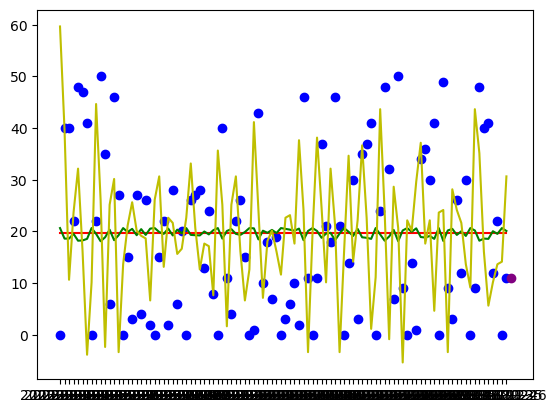

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
from os import getcwd
# from class_filetools_module import mkdir, NowTime

# dirpath = getcwd() + '/plot_file/mean_reversion/'

# mkdir(dirpath).__repr__()


case = [random.randint(1, 50) for i in range(100)]
P_src = np.array([i % 7 == 0 and np.nan or case[i] for i in range(len(case))])  # 价格列表 -Y轴


def get_nday_list(n):
    '''
    日
    期列表创建函数
    :param n:
    :return:
    '''
    before_n_days = []
    for i in range(1, n + 1)[::-1]:
        before_n_days.append(str(datetime.date.today() - datetime.timedelta(days=i)))
    return before_n_days


DATE = get_nday_list(len(P_src) + 1)[:-1]  # 日期列表


# ：TODO 这是一个均值回归的函数
def mean_reversion(Date, Psrc):
    #P_index = np.isnan(Psrc)
    P = np.nan_to_num(Psrc,0) #np.array([Psrc[i] if P_index[i] != True else 0 for i in range(len(P_index))])
    MA = np.mean(P)  # y轴截距 -> 周期均价
    A = (MA - P) / MA  # 当前价格预期斜率 ，+代表涨，负代表跌

    print('当前预期斜率A：', A[-1])
    P_now = P[-1]  # 当前价格
    grad = np.gradient(P)

    plt.scatter(Date, Psrc, color='b')  # 价格点
    meanline_Y = np.full(P.size,MA)#[MA for i in range(len(P))]  # 均值位置
    plt.plot(list(range(len(Date))), meanline_Y, color='r')  # 均值回归线
    plt.scatter(len(Date), P_now, color='purple')  # 当前价格点
    plt.plot(list(range(len(A))), A + meanline_Y, color='g')  # 均值斜率线
    plt.plot(list(range(len(P))), grad + meanline_Y, color='y')  # 价格的梯度
    # plt.savefig(dirpath + 'mean_reversion' + NowTime() + '.png')
    # plt.show()

    print('周期均价：', MA)
    print('共交易次数：', len(P))  # x
    print('当前价格为：', P_now)  # y
    print('当前价格预期增长斜率:', A[-1])  # k
    print('斜率变化向量：\n', A)
    print('价格向量：\n', P)
    print('价格梯度：\n', grad)

    A[A == 1] = np.nan
    return A[-1]


'''
根据直线公式 y = ax+b
Y是直线的纵坐标，A斜率，X是X轴的坐标，B是截距
假设日期是连续的：预期价格 
已知一点（x0,y0）,斜率为k,
则方程可以设为：y-y0=k(x-x0)
这种方程也称为点斜式方程。
'''

if __name__ == '__main__':
    print(mean_reversion(DATE, P_src))

